# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Manipulasi data
import pandas as pd
import numpy as np

# Visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Pra-pemrosesan data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

# Model klasifikasi
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluasi model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, ConfusionMatrixDisplay
from scipy.stats import randint

# Impot Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
file_path = '/content/drive/MyDrive/Colab Notebooks/hasil_clustering.csv'
df = pd.read_csv(file_path)

df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Revenue_per_Unit,Cluster
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23,1.493962,0
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23,1.404000,0
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23,1.111507,0
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23,2.897966,0
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23,0.782857,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
df_clean = df.copy()

num_cols = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']
df_clean_subset = df_clean[num_cols + ['Cluster']].copy()

X = df_clean_subset.drop(columns=['Cluster'])  # fitur
y = df_clean_subset['Cluster']                 # label

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

Jumlah data training: 4000
Jumlah data testing: 1000


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [4]:
# 1. Klasifikasi KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# 2. Klasifikasi Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)


1. **K-Nearest Neighbors (KNN)**

Algoritma K-Nearest Neighbors (KNN) adalah salah satu metode klasifikasi yang berbasis pada prinsip kedekatan atau jarak antara data. Pada dasarnya, KNN tidak melakukan proses pembelajaran eksplisit, melainkan menyimpan seluruh data pelatihan dan melakukan prediksi berdasarkan kedekatan data uji terhadap data latih.

Dalam implementasi ini, digunakan n_neighbors=5, artinya untuk setiap data uji, KNN akan melihat 5 data latih terdekat berdasarkan jarak (biasanya Euclidean distance). Kelas mayoritas dari kelima tetangga tersebut akan menjadi hasil prediksi.

KNN sangat bergantung pada skala fitur dan sensitivitas terhadap outlier, sehingga preprocessing seperti normalisasi/standarisasi menjadi penting. Algoritma ini cocok digunakan ketika data memiliki struktur yang jelas dan tidak terlalu besar secara ukuran.

2. **Naive Bayes**

Naive Bayes adalah algoritma klasifikasi berbasis probabilistik yang menggunakan Teorema Bayes dengan asumsi sederhana (naive) bahwa setiap fitur bersifat independen satu sama lain terhadap kelas target. Meskipun asumsi ini jarang sepenuhnya terpenuhi dalam data nyata, Naive Bayes tetap memberikan performa yang baik dalam banyak kasus.

Dalam proyek ini, digunakan Gaussian Naive Bayes, yang mengasumsikan bahwa nilai fitur-fitur numerik terdistribusi normal (Gaussian). Algoritma ini menghitung probabilitas setiap kelas yang mungkin untuk data uji, dan memilih kelas dengan probabilitas tertinggi sebagai prediksi.

Naive Bayes cenderung cepat dalam pelatihan dan prediksi, serta cukup kuat untuk dataset berukuran besar. Kelemahannya terletak pada performa yang menurun jika fitur-fitur memiliki korelasi tinggi satu sama lain.



## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


>> Evaluasi Model: K-Nearest Neighbors
Akurasi     : 0.9960
F1-Score    : 0.9960
Precision   : 0.9960
Recall      : 0.9960


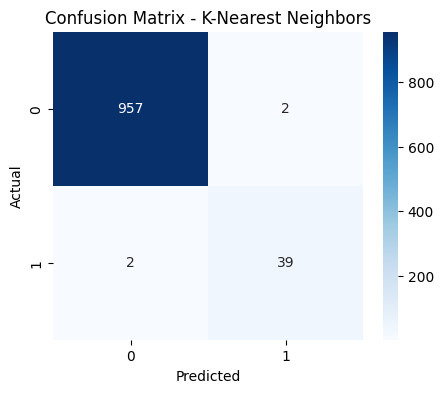


>> Evaluasi Model: Naive Bayes
Akurasi     : 0.9660
F1-Score    : 0.9707
Precision   : 0.9814
Recall      : 0.9660


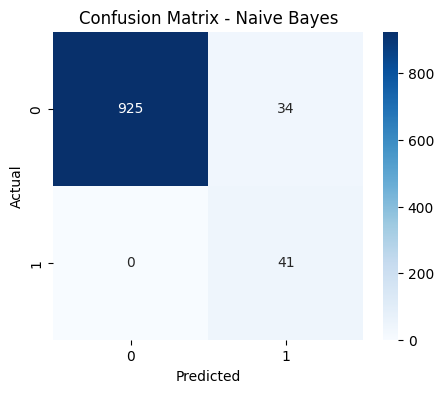

In [5]:
# Fungsi evaluasi dan visualisasi confusion matrix
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    print(f"\n>> Evaluasi Model: {name}")
    print(f"Akurasi     : {acc:.4f}")
    print(f"F1-Score    : {f1:.4f}")
    print(f"Precision   : {precision:.4f}")
    print(f"Recall      : {recall:.4f}")

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ===== Evaluasi KNN =====
y_pred_knn = knn.predict(X_test)
evaluate_model("K-Nearest Neighbors", y_test, y_pred_knn)

# ===== Evaluasi Naive Bayes =====
y_pred_nb = nb.predict(X_test)
evaluate_model("Naive Bayes", y_test, y_pred_nb)

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [6]:
# ===== Tuning KNN =====
param_dist_knn = {
    'n_neighbors': randint(3, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()
rand_search_knn = RandomizedSearchCV(knn, param_distributions=param_dist_knn,
                                     n_iter=20, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
rand_search_knn.fit(X_train, y_train)

print(">> Best parameters for KNN:")
print(rand_search_knn.best_params_)

# ===== Tuning Naive Bayes =====
param_dist_nb = {
    'var_smoothing': np.logspace(-11, -7, num=100)
}

nb = GaussianNB()
rand_search_nb = RandomizedSearchCV(nb, param_distributions=param_dist_nb,
                                    n_iter=20, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
rand_search_nb.fit(X_train, y_train)

print("\n>> Best parameters for Naive Bayes:")
print(rand_search_nb.best_params_)

>> Best parameters for KNN:
{'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}

>> Best parameters for Naive Bayes:
{'var_smoothing': np.float64(4.328761281083061e-08)}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

>> Evaluasi KNN (Setelah Tuning):
Accuracy: 0.998
F1 Score: 0.9875733174271797
Precision: 0.9767441860465116
Recall: 0.9989572471324296


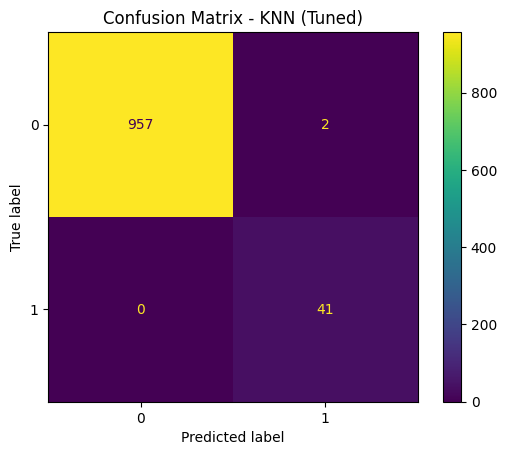


>> Evaluasi Naive Bayes (Setelah Tuning):
Accuracy: 0.966
F1 Score: 0.8444249212973132
Precision: 0.7733333333333333
Recall: 0.9822732012513035


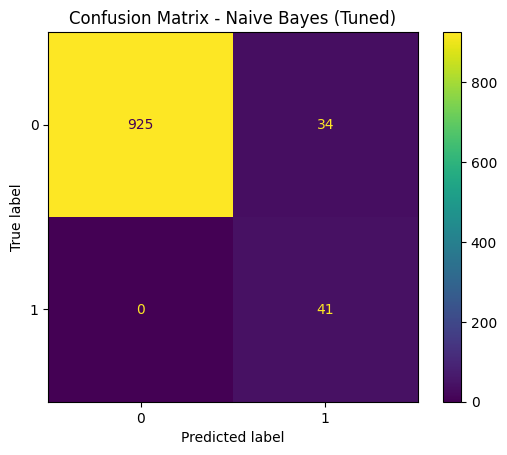

In [7]:
# ===== Evaluasi KNN terbaik =====
best_knn = rand_search_knn.best_estimator_
y_pred_knn_best = best_knn.predict(X_test)

print(">> Evaluasi KNN (Setelah Tuning):")
print("Accuracy:", accuracy_score(y_test, y_pred_knn_best))
print("F1 Score:", f1_score(y_test, y_pred_knn_best, average='macro'))
print("Precision:", precision_score(y_test, y_pred_knn_best, average='macro'))
print("Recall:", recall_score(y_test, y_pred_knn_best, average='macro'))

cm_knn = confusion_matrix(y_test, y_pred_knn_best)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()
plt.title("Confusion Matrix - KNN (Tuned)")
plt.show()


# ===== Evaluasi Naive Bayes terbaik =====
best_nb = rand_search_nb.best_estimator_
y_pred_nb_best = best_nb.predict(X_test)

print("\n>> Evaluasi Naive Bayes (Setelah Tuning):")
print("Accuracy:", accuracy_score(y_test, y_pred_nb_best))
print("F1 Score:", f1_score(y_test, y_pred_nb_best, average='macro'))
print("Precision:", precision_score(y_test, y_pred_nb_best, average='macro'))
print("Recall:", recall_score(y_test, y_pred_nb_best, average='macro'))

cm_nb = confusion_matrix(y_test, y_pred_nb_best)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp_nb.plot()
plt.title("Confusion Matrix - Naive Bayes (Tuned)")
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

1. **Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning**

Model K-Nearest Neighbors (KNN) menunjukkan peningkatan kinerja setelah dilakukan tuning. Akurasi naik dari 0.996 menjadi 0.998, dan recall meningkat dari 0.996 ke 0.9989. Ini menunjukkan bahwa model semakin baik dalam menangkap semua data yang benar, meskipun precision dan F1-score sedikit menurun karena kemungkinan adanya trade-off antara presisi dan sensitivitas model. Sebaliknya, model Naive Bayes tidak menunjukkan peningkatan performa secara signifikan setelah tuning. Akurasi tetap di angka 0.966, namun precision dan F1-score justru menurun cukup besar. Hal ini menunjukkan bahwa tuning pada Naive Bayes kurang optimal atau bahkan berdampak negatif terhadap kestabilan prediksinya.

2. **Identifikasi Kelemahan Model**

Kelemahan model dapat dilihat pada hasil evaluasi Naive Bayes, di mana precision menurun drastis setelah tuning. Ini mengindikasikan bahwa model cenderung memberikan lebih banyak false positive, atau memprediksi kelas yang salah sebagai positif. Selain itu, F1-score yang menurun menunjukkan bahwa keseimbangan antara precision dan recall memburuk, terutama pada kelas minoritas yang jumlah datanya lebih sedikit. Sementara itu, pada model KNN, meskipun hasil evaluasi sangat baik secara keseluruhan, penurunan kecil pada F1 dan precision menunjukkan bahwa model mungkin menjadi sedikit lebih permisif terhadap kelas tertentu.

3. **Overfitting atau Underfitting**

Model KNN setelah tuning menunjukkan performa tinggi pada data uji, yang mengindikasikan bahwa model tidak mengalami overfitting. Hasil metrik yang tetap tinggi dan stabil menunjukkan bahwa model mampu melakukan generalisasi dengan baik. Di sisi lain, model Naive Bayes kemungkinan mengalami ketidakseimbangan antara sensitivitas dan presisi, terutama setelah tuning. Ini bisa menjadi indikasi awal terjadinya underfitting, di mana model terlalu sederhana atau tidak cukup fleksibel untuk menangkap kompleksitas data, terutama jika distribusi data antar kelas tidak homogen.

4. **Rekomendasi Tindakan Lanjutan**

Berdasarkan hasil evaluasi, beberapa tindakan yang dapat dilakukan untuk meningkatkan kinerja model antara lain: mencoba algoritma klasifikasi lain yang lebih kompleks seperti Random Forest, Gradient Boosting, atau Support Vector Machine untuk membandingkan performa secara menyeluruh. Selain itu, mengumpulkan lebih banyak data, terutama dari kelas minoritas, akan membantu model belajar distribusi yang lebih representatif. Feature engineering tambahan seperti pembuatan variabel baru atau seleksi fitur juga dapat dipertimbangkan untuk memperkuat sinyal dalam data. Terakhir, penggunaan teknik balancing seperti SMOTE bisa menjadi solusi bila ada ketidakseimbangan kelas yang memengaruhi performa model.